# K- Nearest Neighbors!!!!!

In [ ]:
#note:final is a data frame that conatins data after all the preprocessing have been done!!
#finaldf.pk was generated in the previous stage!!!!(Precrocessing phase!!)
import pandas as pd
final = pd.read_pickle('finaldf.pk')

In [4]:
#Now Random Sampling of data
Sample_df = final.sample(50000)
result = Sample_df.sort_values("Time")
#Now converting the CleanedText column into vector!!
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(result["CleanedText"].values)

#Now since we are performing time based slicing the first 70 percent of the data will be train data rest we will consider as test data
Train = x[0:35000]
Test = x[35000:50000]
Trainy = result["score"][0:35000] 
Testy = result["score"][35000:50000] 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier



# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(Train, Trainy, test_size=0.3)

for i in range(1,30,2):
  neigh = KNeighborsClassifier(n_neighbors=i)
  #fitting model to X_tr and y_tr
  neigh.fit(X_tr,y_tr)
  #prediction on X_crossvalidate
  pre = neigh.predict(X_cv)
  acc = accuracy_score(y_cv, pre, normalize=True) * float(100)
  print('\nCV accuracy for k = %d is %d%%' % (i, acc))

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



CV accuracy for k = 1 is 82%

CV accuracy for k = 3 is 84%

CV accuracy for k = 5 is 84%

CV accuracy for k = 7 is 85%

CV accuracy for k = 9 is 85%

CV accuracy for k = 11 is 84%

CV accuracy for k = 13 is 84%

CV accuracy for k = 15 is 84%

CV accuracy for k = 17 is 84%

CV accuracy for k = 19 is 84%

CV accuracy for k = 21 is 84%

CV accuracy for k = 23 is 84%

CV accuracy for k = 25 is 84%

CV accuracy for k = 27 is 84%

CV accuracy for k = 29 is 84%


In [0]:
neigh = KNeighborsClassifier(n_neighbors=9)
#fitting model to X_tr and y_tr
neigh.fit(X_tr,y_tr)
#prediction on X_crossvalidate
pre = neigh.predict(Test)
acc = accuracy_score(Testy, pre, normalize=True) * float(100)


The optimal number of neighbors is 9.


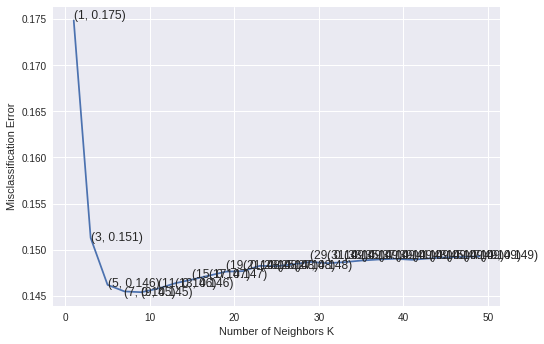

the misclassification error for each k value is :  [0.175 0.151 0.146 0.145 0.145 0.146 0.146 0.147 0.147 0.148 0.148 0.148
 0.148 0.148 0.149 0.149 0.149 0.149 0.149 0.149 0.149 0.149 0.149 0.149
 0.149]


In [5]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Train, Trainy, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [7]:
#Since we found our optimal k as 9 now we will train the model with k = 9
neigh = KNeighborsClassifier(n_neighbors=9)
  #fitting model to X_tr and y_tr
neigh.fit(Train,Trainy)
#prediction on X_crossvalidate
pre = neigh.predict(Test)
acc = accuracy_score(Testy, pre, normalize=True) * float(100)
print('\nCV accuracy for k = %d is %d%%' % (9, acc))


CV accuracy for k = 9 is 83%


# Now we will use tfidf


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(result["CleanedText"].values)
Train = final_tf_idf[0:35000]
Test = final_tf_idf[35000:50000]
Trainy = result["score"][0:35000] 
Testy = result["score"][35000:50000] 


The optimal number of neighbors is 9.


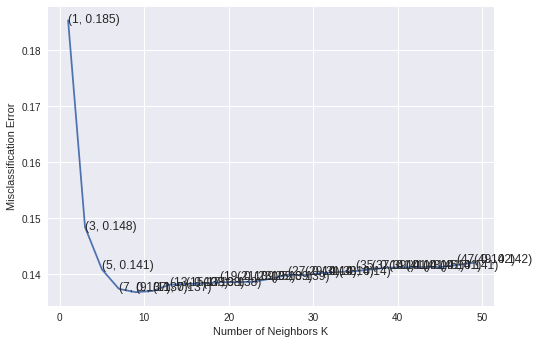

the misclassification error for each k value is :  [0.185 0.148 0.141 0.137 0.137 0.137 0.138 0.138 0.138 0.139 0.139 0.139
 0.139 0.14  0.14  0.14  0.14  0.141 0.141 0.141 0.141 0.141 0.141 0.142
 0.142]


In [10]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Train, Trainy, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [11]:
#Since we found our optimal k as 9 now we will train the model with k = 9
neigh = KNeighborsClassifier(n_neighbors=9)
  #fitting model to X_tr and y_tr
neigh.fit(Train,Trainy)
#prediction on X_crossvalidate
pre = neigh.predict(Test)
acc = accuracy_score(Testy, pre, normalize=True) * float(100)
print('\nCV accuracy for k = %d is %d%%' % (9, acc))


CV accuracy for k = 9 is 84%
